# Sources

- [Master Polynomial Regression With Easy-to-Follow Tutorials](https://www.analyticsvidhya.com/blog/2021/07/all-you-need-to-know-about-polynomial-regression)
- [Linear and Polynomial Regression using Scikit-learn Part 12](https://www.youtube.com/watch?v=e4c_UP2fSjg&list=PLlrxD0HtieHjNnGcZ1TWzPjKYWgfXSiWG&index=13&ab_channel=MicrosoftDeveloper)

# Explanations

- Polynomial Regression comes into the picture when the linear regression doesn't help with non-linear relationship.

In [40]:
import numpy as np

# Create 200 random X points in range [-3, 3]
X = 6 * np.random.rand(200, 1) - 3

# Create some random noise in the data so that while modeling, it does not overfit it
noise = np.random.rand(200, 1)

# Create 200 random y points that sticks to the equation
y = 0.8 * X**2 + 0.9 * X + noise

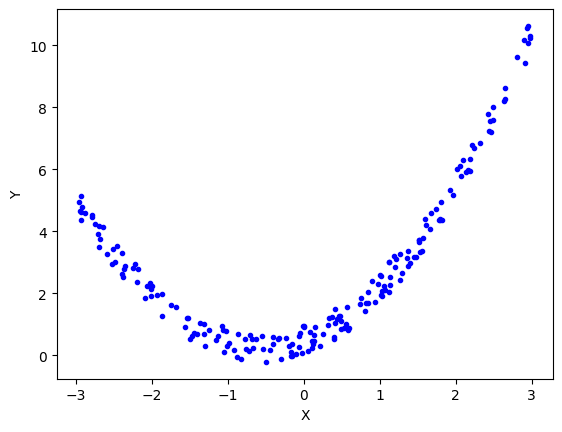

In [41]:
import matplotlib.pyplot as plt

# Visualize the data
plt.plot(X, y, 'b.')
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [42]:
from sklearn.model_selection import train_test_split

# Split data in the train and test set
# Apply the shuffling on data 2 times before splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Apply simple linear regression
linearRegression = LinearRegression()
linearRegression.fit(X_train, y_train)
y_pred = linearRegression.predict(X_test)

# We can see how worse the model is performing
print(r2_score(y_test, y_pred))

0.2809906394111966


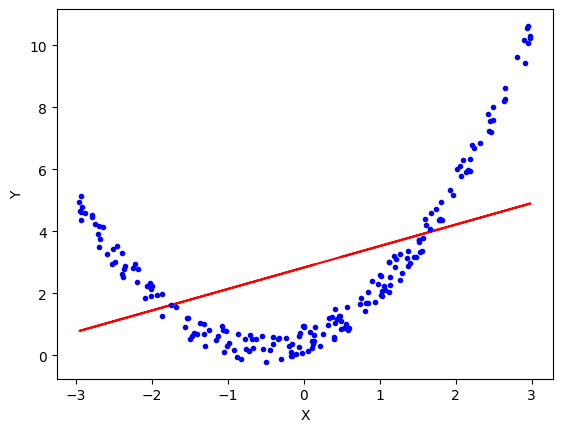

In [44]:
plt.plot(X_train, linearRegression.predict(X_train), color="r")
plt.plot(X, y, "b.")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [45]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

# Apply polynomial regression degree 2
poly = PolynomialFeatures(degree=2, include_bias=True)

# Build a polynomial regression pipeline
pipeline = make_pipeline(poly, linearRegression)

# Use the pipeline to build the model
pipeline.fit(X_train, y_train)

# Test the model with our test data
y_pred = pipeline.predict(X_test)

# Calculate and print the mean squared error
mse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Mean error: {mse:3.3} ({mse/np.mean(y_pred)*100:3.3}%)')

# Score the model
score = pipeline.score(X_train, y_train)
print('Model determination: ', score)


Mean error: 0.317 (13.0%)
Model determination:  0.9870164671900675


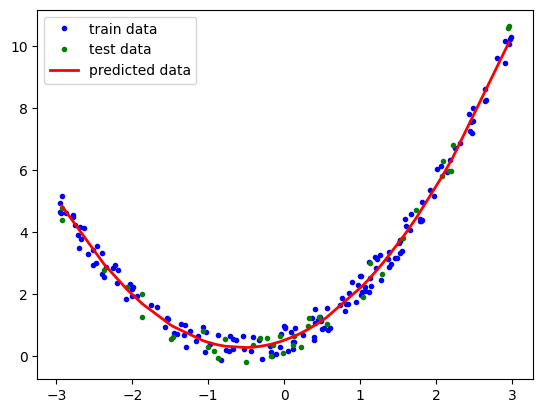

In [46]:
# Plot the results
plt.plot(X_train, y_train, "b.", label="train data")
plt.plot(X_test, y_test, "g.", label="test data")

X_sorted = sorted(X_test)
plt.plot(X_sorted, pipeline.predict(X_sorted), "r-", linewidth=2, label="predicted data")

# Show
plt.legend(loc='best')
plt.show()